In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [87]:
df = pd.read_excel("Folds5x2_pp.xlsx")

## Temperature (T) in the range 1.81°C and 37.11°C,
## Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
## Relative Humidity (RH) in the range 25.56% to 100.16%
## Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
## Net hourly electrical energy output (EP) 420.26-495.76 MW

In [88]:
print(df.shape)
df.head()

(9568, 5)


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.9 KB


In [111]:
AP_Pascale = []
def changeAP(AP): return lambda: AP*100
listofAP = [changeAP(i) for i in df["AP"]]
for f in listofAP:AP_Pascale.append(f())

In [112]:
Vac_Pascale = []
def changeVac(Vac):return lambda: Vac*1333.2239
listofVac = [changeVac(i) for i in df["V"]]
for v in listofVac: Vac_Pascale.append(v())

In [113]:
Vac_Pascale = pd.DataFrame(data=Vac_Pascale,columns=['Vac_Pascale'])
Vac_Pascale

,Vac_Pascale
0,55675.430064
1,83939.776744
2,52529.021660
3,76420.393948
4,49995.896250
...,...
9563,66247.895591
9564,52235.712402
9565,99098.532487
9566,92592.399855


In [114]:
AP_Pascale = pd.DataFrame(data=AP_Pascale,columns=['AP_Pascale'])
AP_Pascale

,AP_Pascale
0,102407.0
1,102004.0
2,101216.0
3,101024.0
4,100923.0
...,...
9563,101401.0
9564,102367.0
9565,101292.0
9566,101386.0


In [115]:
df_AP_Pascale = df.join(AP_Pascale)
df_AP_Pascale.head()

,AT,V,AP,RH,PE,AP_Pascale
0,14.96,41.76,1024.07,73.17,463.26,102407.0
1,25.18,62.96,1020.04,59.08,444.37,102004.0
2,5.11,39.40,1012.16,92.14,488.56,101216.0
3,20.86,57.32,1010.24,76.64,446.48,101024.0
4,10.82,37.50,1009.23,96.62,473.90,100923.0


In [116]:
df = df_AP_Pascale.join(Vac_Pascale)
df.head()

,AT,V,AP,RH,PE,AP_Pascale,Vac_Pascale
0,14.96,41.76,1024.07,73.17,463.26,102407.0,55675.430064
1,25.18,62.96,1020.04,59.08,444.37,102004.0,83939.776744
2,5.11,39.40,1012.16,92.14,488.56,101216.0,52529.021660
3,20.86,57.32,1010.24,76.64,446.48,101024.0,76420.393948
4,10.82,37.50,1009.23,96.62,473.90,100923.0,49995.896250


In [117]:
df["AP"] = df["AP_Pascale"]
df["V"] = df["Vac_Pascale"]

In [118]:
df.head()

,AT,V,AP,RH,PE,AP_Pascale,Vac_Pascale
0,14.96,55675.430064,102407.0,73.17,463.26,102407.0,55675.430064
1,25.18,83939.776744,102004.0,59.08,444.37,102004.0,83939.776744
2,5.11,52529.021660,101216.0,92.14,488.56,101216.0,52529.021660
3,20.86,76420.393948,101024.0,76.64,446.48,101024.0,76420.393948
4,10.82,49995.896250,100923.0,96.62,473.90,100923.0,49995.896250


In [119]:
df.drop(labels=["AP_Pascale","Vac_Pascale"],axis=1,inplace=True)


In [120]:
df.head()

,AT,V,AP,RH,PE
0,14.96,55675.430064,102407.0,73.17,463.26
1,25.18,83939.776744,102004.0,59.08,444.37
2,5.11,52529.021660,101216.0,92.14,488.56
3,20.86,76420.393948,101024.0,76.64,446.48
4,10.82,49995.896250,100923.0,96.62,473.90


In [121]:
df.rename(columns={'V':'Vac_Pascale','AP':'AP_Pascale'},inplace=True)

In [122]:
df.head()

,AT,Vac_Pascale,AP_Pascale,RH,PE
0,14.96,55675.430064,102407.0,73.17,463.26
1,25.18,83939.776744,102004.0,59.08,444.37
2,5.11,52529.021660,101216.0,92.14,488.56
3,20.86,76420.393948,101024.0,76.64,446.48
4,10.82,49995.896250,100923.0,96.62,473.90


In [134]:
df.describe()

,AT,Vac_Pascale,AP_Pascale,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,72401.795429,101325.907818,73.308978,454.365009
std,7.452473,16942.466664,593.878371,14.600269,17.066995
min,1.810000,33810.558104,99289.000000,25.560000,420.260000
25%,13.510000,55648.765586,100910.000000,63.327500,439.750000
50%,20.345000,69434.300712,101294.000000,74.975000,451.550000
75%,25.720000,88712.718306,101726.000000,84.830000,468.430000
max,37.110000,108737.741284,103330.000000,100.160000,495.760000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002092B4ED898>,
      dtype=object)

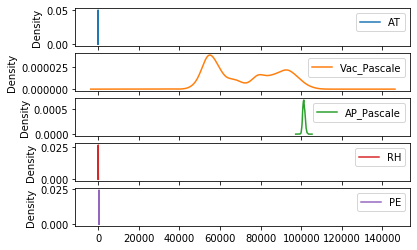

In [166]:
df.plot(kind='kde',subplots=True)

In [155]:
from sklearn.model_selection import train_test_split

In [162]:
X = df.drop(labels=["PE"],axis=1)
y = df["PE"]

In [233]:
X.head()

,AT,Vac_Pascale,AP_Pascale,RH
0,14.96,55675.430064,102407.0,73.17
1,25.18,83939.776744,102004.0,59.08
2,5.11,52529.021660,101216.0,92.14
3,20.86,76420.393948,101024.0,76.64
4,10.82,49995.896250,100923.0,96.62


In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [167]:
from sklearn.preprocessing import MinMaxScaler

In [168]:
scaler = MinMaxScaler()

In [169]:
X_train_scaled = scaler.fit_transform(X_train)

In [170]:
X_train_scaled

array([[0.52746621, 0.29679715, 0.42835932, 0.50770881],
       [0.51308599, 0.55462633, 0.67829745, 0.69097734],
       [0.63071613, 0.76370107, 0.31031923, 0.56401662],
       ...,
       [0.26287029, 0.21601423, 0.53179906, 0.59243866],
       [0.12798389, 0.24928826, 0.66567681, 0.62783215],
       [0.17515099, 0.27117438, 0.55679287, 0.88818877]])

In [237]:
X_train_scaled_new = pd.DataFrame(X_train_scaled,columns=[['AT','Vac_Pascale','AP_Pascale','RH']])
X_train_scaled_new.head()

,AT,Vac_Pascale,AP_Pascale,RH
0,0.527466,0.296797,0.428359,0.507709
1,0.513086,0.554626,0.678297,0.690977
2,0.630716,0.763701,0.310319,0.564017
3,0.571470,0.405338,0.549122,0.552889
4,0.459879,0.475445,0.219995,0.999196


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020930BC72B0>,
      dtype=object)

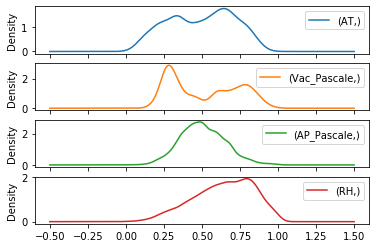

In [238]:
X_train_scaled_new.plot(kind='kde',subplots=True)

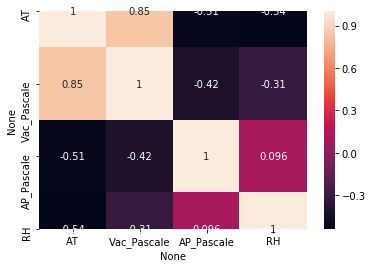

In [239]:
X_train_corr = X_train_scaled_new.corr()
sns.heatmap(X_train_corr,annot=True)

In [171]:
X_test_scaled = scaler.transform(X_test)

In [211]:
X_test_scaled

array([[0.27523727, 0.33967972, 0.70527097, 0.79005229],
       [0.36151855, 0.38327402, 0.66072754, 0.97251642],
       [0.4662065 , 0.64964413, 0.3850532 , 0.53277919],
       ...,
       [0.82772505, 0.77544484, 0.32566196, 0.57514412],
       [0.65775093, 0.37099644, 0.44493937, 0.45300979],
       [0.65487489, 0.74661922, 0.53452116, 0.44013943]])

In [240]:
X_test_scaled_new = pd.DataFrame(X_test_scaled,columns=[['AT','Vac_Pascale','AP_Pascale','RH']])
X_test_scaled_new.head()

,AT,Vac_Pascale,AP_Pascale,RH
0,0.275237,0.339680,0.705271,0.790052
1,0.361519,0.383274,0.660728,0.972516
2,0.466206,0.649644,0.385053,0.532779
3,0.611447,0.617794,0.609255,0.502212
4,0.508197,0.614057,0.646127,0.785092


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000209303AC2B0>,
      dtype=object)

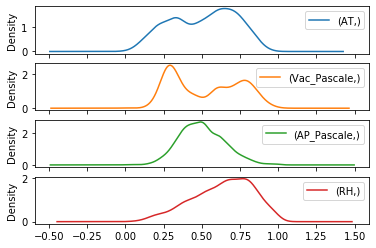

In [241]:
X_test_scaled_new.plot(kind='kde',subplots=True)

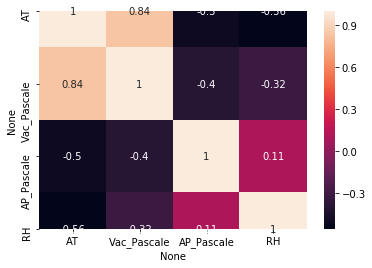

In [242]:
X_test_corr = X_test_scaled_new.corr()
sns.heatmap(X_test_corr,annot=True)

In [177]:
from sklearn.linear_model import LinearRegression

In [178]:
lm = LinearRegression()

In [243]:
lm.fit(X_train_scaled_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [244]:
pred = lm.predict(X_test_scaled_new)

In [252]:
print(y_test[0],pred[0])

463.26 470.77127792794585


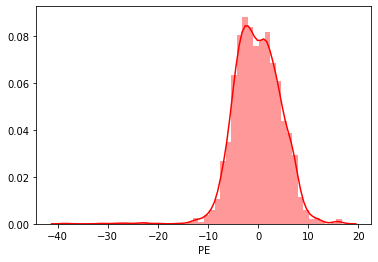

In [246]:
sns.distplot((y_test-pred),bins=50,color='r');

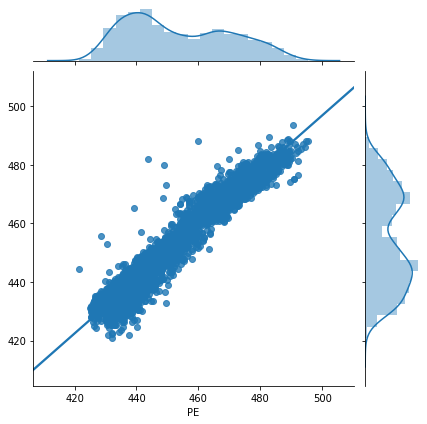

In [247]:
sns.jointplot(x=y_test,y=pred,kind='reg')

In [248]:
from sklearn import metrics

In [249]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.6031198032767175
MSE: 21.02334249304976
RMSE: 4.585121862399053
